In [105]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [106]:
ice = pd.read_csv('Ice.csv')
ice

,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive
Nogger,0.205882,0.117647,0.127451,0.009804,0.029412,0.058824,0.107843,0.117647,0.068627,0.068627,0.078431,0.078431,0.078431,0.088235
Magnum,0.411765,0.343137,0.294118,0.019608,0.068627,0.225490,0.264706,0.392157,0.245098,0.186275,0.245098,0.029412,0.088235,0.549020
Cornetto,0.480392,0.294118,0.294118,0.049020,0.107843,0.196078,0.294118,0.401961,0.264706,0.088235,0.098039,0.029412,0.117647,0.352941
Viennetta,0.117647,0.137255,0.078431,0.000000,0.029412,0.049020,0.274510,0.284314,0.039216,0.088235,0.019608,0.088235,0.049020,0.196078
Max,0.000000,0.019608,0.009804,0.000000,0.009804,0.009804,0.000000,0.019608,0.009804,0.039216,0.019608,0.117647,0.058824,0.019608
Solero,0.235294,0.245098,0.049020,0.147059,0.225490,0.117647,0.078431,0.127451,0.107843,0.088235,0.235294,0.117647,0.137255,0.176471
Jolly,0.313725,0.147059,0.049020,0.284314,0.294118,0.225490,0.068627,0.029412,0.107843,0.098039,0.039216,0.009804,0.362745,0.029412
Calippo,0.343137,0.225490,0.088235,0.529412,0.460784,0.235294,0.078431,0.000000,0.245098,0.176471,0.254902,0.009804,0.431373,0.049020
Twinni,0.372549,0.215686,0.068627,0.313725,0.323529,0.274510,0.058824,0.029412,0.254902,0.098039,0.098039,0.019608,0.441176,0.039216
Tritti,0.019608,0.019608,0.009804,0.029412,0.019608,0.049020,0.000000,0.009804,0.019608,0.039216,0.009804,0.098039,0.058824,0.009804


In [107]:
normalized_ice = (ice-ice.mean())/ice.std()

In [108]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(normalized_ice)
    sse.append(km.inertia_)

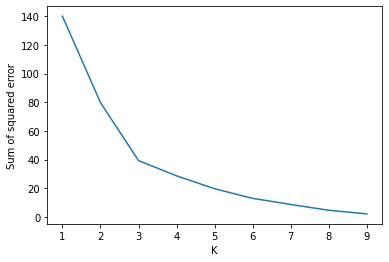

In [109]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

### We graph the relationship between the number of clusters and Within Cluster Sum of Squares (WCSS) then we select the number of clusters where the change in WCSS begins to level off (elbow method). For as it is k = 3

In [110]:
km = KMeans(n_clusters=3, n_init=75).fit(normalized_ice)

In [111]:
normalized_ice['cluster']=km.labels_
normalized_ice = normalized_ice.reset_index()

In [112]:
normalized_ice = normalized_ice.rename({'index': 'ice_cream'}, axis='columns')
normalized_ice

,ice_cream,tastes_excellent,look_good,satisfies_hunger,satisfies_thirst,refreshing,for_everyday,for_special,for_adults,favorite,different,cool,never_eat,fun,expensive,cluster
0,Nogger,-0.250588,-0.502230,0.270724,-0.686407,-0.797315,-0.942822,-0.048123,-0.080108,-0.679156,-0.490197,-0.333246,0.346679,-0.704428,-0.295087,1
1,Magnum,1.064999,1.651402,1.903803,-0.630060,-0.539360,0.856236,1.363486,1.682265,1.090225,1.906320,1.447238,-0.774929,-0.640914,2.381407,2
2,Cornetto,1.503528,1.183221,1.903803,-0.461020,-0.281405,0.538756,1.628163,1.745207,1.286823,-0.090777,-0.123777,-0.774929,-0.450372,1.242473,2
3,Viennetta,-0.814411,-0.314958,-0.209593,-0.742754,-0.797315,-1.048649,1.451712,0.989904,-0.974053,-0.090777,-0.961652,0.571001,-0.894970,0.331326,1
4,Max,-1.566175,-1.438592,-0.882037,-0.742754,-0.926292,-1.471957,-1.018604,-0.709527,-1.268950,-1.089326,-0.961652,1.243966,-0.831456,-0.693714,1
5,Solero,-0.062647,0.715040,-0.497783,0.102449,0.492459,-0.307860,-0.312800,-0.017166,-0.285961,-0.090777,1.342504,1.243966,-0.323344,0.217433,1
6,Jolly,0.438529,-0.221322,-0.497783,0.891305,0.943880,0.856236,-0.401025,-0.646585,-0.285961,0.108933,-0.752183,-1.223573,1.137479,-0.636767,0
7,Calippo,0.626470,0.527768,-0.113530,2.299977,2.040187,0.962063,-0.312800,-0.835410,1.090225,1.706610,1.551973,-1.223573,1.582077,-0.522874,0
8,Twinni,0.814411,0.434131,-0.305656,1.060346,1.137346,1.385371,-0.489251,-0.646585,1.188524,0.108933,-0.123777,-0.999251,1.645591,-0.579821,0
9,Tritti,-1.440881,-1.438592,-0.882037,-0.573714,-0.861803,-1.048649,-1.018604,-0.772468,-1.170651,-1.089326,-1.066386,0.795322,-0.831456,-0.750661,1


In [113]:
print(normalized_ice[['ice_cream', "cluster"]])

    ice_cream  cluster
0      Nogger        1
1      Magnum        2
2    Cornetto        2
3   Viennetta        1
4         Max        1
5      Solero        1
6       Jolly        0
7     Calippo        0
8      Twinni        0
9      Tritti        1
10    Tschisi        1


In [114]:
from pca import pca

In [115]:
ice_pca = pca(n_components=4, normalize=True)
pca_results = ice_pca.fit_transform(normalized_ice.iloc[:, 2:])

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [14] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [116]:
pc = ice_pca.results['PC'].iloc[:, 0:2]
pc

,PC1,PC2
0,-1.616238,-1.036541
1,4.237435,-3.470235
2,2.754237,-3.067856
3,-1.261273,-2.167594
4,-3.931903,-0.363505
5,-0.072901,-0.077088
6,0.321887,2.709526
7,3.140361,3.839795
8,1.636648,3.091146
9,-3.615316,-0.091329


In [117]:
proj_cluster_means = ice_pca.transform(np.array(km.cluster_centers_)) 

[pca] >Column labels are auto-completed.
[pca] >Row labels are auto-completed.
[pca] >Normalizing input data per feature (zero mean and unit variance)..


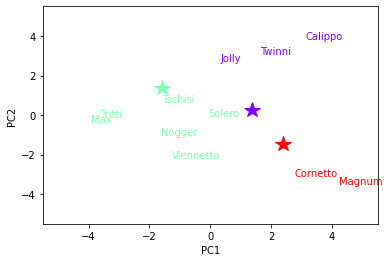

In [118]:
fig = plt.figure()
ax = plt.axis([-5.5, 5.5, -5.5, 5.5])
colors = plt.cm.get_cmap("rainbow", 3)
for index, row in pc.iterrows():
    color = colors(km.labels_[index])
    plt.text(row["PC1"], row["PC2"], normalized_ice["ice_cream"][index], {"color": color})
for index in range(0, proj_cluster_means["PC1"].values.shape[0]):    
    m1 = proj_cluster_means["PC1"].values[index]
    m2 = proj_cluster_means["PC2"].values[index]
    plt.plot(m1, m2, color=colors(index), marker="*", markersize=16)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [119]:
#purple green red

In [120]:
df = pd.DataFrame({'centers0': km.cluster_centers_[0], 'centers1': km.cluster_centers_[1], 'centers2': km.cluster_centers_[2],'names': km.feature_names_in_})
df

,centers0,centers1,centers2,names
0,0.626470,-0.741323,1.284264,tastes_excellent
1,0.246859,-0.595867,1.417311,look_good
2,-0.305656,-0.481773,1.903803,satisfies_hunger
3,1.417209,-0.526758,-0.545540,satisfies_thirst
4,1.373804,-0.550108,-0.410383,refreshing
5,1.067890,-0.766444,0.697496,for_everyday
6,-0.401025,-0.298096,1.495825,for_special
7,-0.709527,-0.216482,1.713736,for_adults
8,0.664263,-0.728306,1.188524,favorite
9,0.641492,-0.623336,0.907771,different


In [121]:
from kmeans_interp.kmeans_feature_imp import KMeansInterp

In [122]:
normalized_ice_f = normalized_ice.drop('ice_cream', axis='columns')
normalized_ice_f = normalized_ice_f.drop('cluster', axis='columns')

In [123]:
kmf = KMeansInterp(
	n_clusters=3,
	ordered_feature_names=normalized_ice_f.columns.tolist(), 
	feature_importance_method='wcss_min',
).fit(normalized_ice_f.values)

In [124]:
kmf.feature_importances_[0]

[('never_eat', 0.8327092953043086),
 ('for_everyday', 0.7664438411633937),
 ('tastes_excellent', 0.7413228496523698),
 ('favorite', 0.7283058906730484),
 ('different', 0.6233364115381809),
 ('look_good', 0.5958666180497905),
 ('refreshing', 0.5501080037200082),
 ('fun', 0.5456432955191791),
 ('satisfies_thirst', 0.5267578550354584),
 ('satisfies_hunger', 0.4817727958050825),
 ('cool', 0.3332456883965619),
 ('expensive', 0.3140695764883123),
 ('for_special', 0.298095524476007),
 ('for_adults', 0.21648190678880228)]

'never_eat', 'for_everyday', 'tastes_exccellent', 'favirite' best characterize cluster number 0 

In [125]:
kmf.feature_importances_[1]

[('fun', 1.455048788051145),
 ('satisfies_thirst', 1.4172091399657387),
 ('refreshing', 1.3738043574250995),
 ('never_eat', 1.1487989461749248),
 ('for_everyday', 1.0678903728343527),
 ('for_adults', 0.7095266019862044),
 ('favorite', 0.6642626323930068),
 ('different', 0.6414918410004563),
 ('tastes_excellent', 0.6264700137907353),
 ('expensive', 0.5798207565938073),
 ('for_special', 0.4010253692502341),
 ('satisfies_hunger', 0.30565645655307355),
 ('look_good', 0.2468590274777698),
 ('cool', 0.2253375607252952)]

'satisfies_hunger', 'expensive', 'for_adults', 'for_special', 'look_good', 'tastes_excellent', 'favorite' have the biggest importance for cluster 1

In [126]:
kmf.feature_importances_[2]

[('satisfies_hunger', 1.9038030722448573),
 ('expensive', 1.8119398643556488),
 ('for_adults', 1.7137356233457128),
 ('for_special', 1.495824627303372),
 ('look_good', 1.4173113129327164),
 ('tastes_excellent', 1.2842635282710078),
 ('favorite', 1.1885237234296369),
 ('different', 0.9077714731138599),
 ('never_eat', 0.774929466650539),
 ('for_everyday', 0.6974959642386513),
 ('cool', 0.6617307241017429),
 ('fun', 0.5456432955191802),
 ('satisfies_thirst', 0.5455401448422333),
 ('refreshing', 0.4103825249776256)]

'fun', 'satisfies_thirst', 'refreshing', 'never_eat', 'for_everyday' best characterize cluster number 2